# SIECI NEURONOWE, PROJEKT 1
#### Autorzy: Mikołaj Rzepiński, Damian Wysokiński

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime
now = datetime.now().strftime("%Y-%m-%d___%H-%M-%S")

### Wybór liczby warstw i liczby węzłów w każdej warstwie

Wybór liczby węzłów w warstwie zerowej (input layer) zależy od rodzaju problemu - czy mamy regresję, czy klasyfikację oraz od liczby kolumn z danymi pobieranymi z plików csv. Analogiczna sytuacja jest z ostatnią warstwą (output layer). Ponadto w warstwie ostatniej wybiera się funkcję aktywacji stosowną do problemu:
- dla regresji (funkcja liniowa)
- dla klasyfikacji (softmax, liczba węzłów zależna od liczby unikalnych wartości w zbiorze uczącym)

##### Dla regresji

Mamy 2 możliwości:
- x - > y
- x, y -> z

In [3]:
regression_problem = True
classification_problem = False

In [4]:
include_bias = True
error_type = 'MSE'# or 'MAE' dostosowac funkcje do tego

In [5]:
#dodac dostosowanie do tego czy jest to plik do regresji czy klasyfikacji

if(regression_problem):
    #'data.activation.train.1000.csv'
    #'data.cube.train.100.csv' 
    regression_train_file = 'regression\data.cube.train.10000.csv' 
    regression_df = pd.read_csv(regression_train_file)
    print(regression_df.head())
    
    #'data.activation.test.1000.csv'
    #'regression\data.cube.test.100.csv'
    regression_test_file = 'regression\data.cube.test.10000.csv'
    regression_test_df = pd.read_csv(regression_test_file)
    
#regression_df.head()

          x           y
0  2.752165   -5.273464
1 -0.255901  -18.276447
2  0.507626    3.871736
3  0.090452   -5.103992
4 -1.382406 -109.483782


In [6]:
if(classification_problem):
    classification_train_file = 'classification\data.three_gauss.test.100.csv'
    #classification_train_file = 'classification\data.simple.test.10000.csv'
    classification_df = pd.read_csv(classification_train_file)
    
    print(classification_df.head())

In [7]:
def create_softmax_array(values_array):
    y_train_normal_labels = values_array.to_numpy().reshape(1,-1)
    
    unique_values = np.unique(y_train_normal_labels)
     
    softmax_list = []
    for idx, unique_value in enumerate(unique_values):
        softmax_list.append(y_train_normal_labels == unique_value)
        
    return np.array(softmax_list).astype('float').reshape(len(unique_values),y_train_normal_labels.shape[1]).astype('float')

In [8]:
if(classification_problem):
    x_train = classification_df[['x','y']].to_numpy().T
    y_train = create_softmax_array(classification_df['cls'])

In [9]:
if(regression_problem):
    x_train = np.array(regression_df['x']).reshape(1,-1)
    y_train = np.array(regression_df['y']).reshape(1,-1)
    
    x_test = np.array(regression_test_df['x']).reshape(1,-1)
    y_test = np.array(regression_test_df['y']).reshape(1,-1)

In [10]:
if(regression_problem):
    print(regression_df.shape)

(10000, 2)


In [11]:
x_train.shape

(1, 10000)

In [12]:
if(regression_problem):
    n_nodes_input_layer = 1
    output_layer_activation_function = "linear"
elif(classification_problem):
    n_nodes_input_layer = 2
    output_layer_activation_function = "softmax"
    

input_layer = [
    {
        "n_nodes": n_nodes_input_layer,
        "activation_function": None
    },
]

hidden_layers = [
    {
        "n_nodes": 4,
        "activation_function": "relu"#"relu" 
    },
    {
        "n_nodes": 4,
        "activation_function": "relu"#"relu"
    },
    {
        "n_nodes": 4,
        "activation_function": "relu"#"relu"
    },
    {
        "n_nodes": 4,
        "activation_function": "relu"#"relu"
    }
    
]

if(regression_problem):
    n_nodes_output_layer = 1
elif(classification_problem):
    n_nodes_output_layer = y_train.shape[0]
    
output_layer = [
    {
        "n_nodes": n_nodes_output_layer,
        "activation_function": output_layer_activation_function
    }, ]

layers = input_layer + hidden_layers + output_layer
layers

[{'n_nodes': 1, 'activation_function': None},
 {'n_nodes': 4, 'activation_function': 'relu'},
 {'n_nodes': 1, 'activation_function': 'linear'}]

W zależności od tego czy chcemy uwzględnić bias w sieci można zmieniać wartość include bias jako True/False

In [13]:
def initialize_parameters(x_train, layers, include_bias = True):
    # zwraca slownik z wagami i biasami np. parameters['w1'], parameters['b1']
    #print(x_train.shape)
    #print()
    np.random.seed(42) # jeśli chcemy za każdym razem te same wyniki
    
    n_features = x_train.shape[0]
    n_examples = x_train.shape[1]
    
    n_layers = len(layers) # 1 dla input layer, 1 dla output layer
#     print(n_layers)
    
    parameters = {}
    activation_values = {}
    
    
    activation_values['0'] = x_train # wartosci x_train są jednocześnie wartościami aktywacji w zerwowej warstwie
    
    for n_layer in range(1,n_layers):
        #print(n_layer)
        #print(layers[n_layer])
        parameters["W" + str(n_layer)] = np.random.randn(layers[n_layer]["n_nodes"], layers[n_layer-1]["n_nodes"]) * 0.01 #wczesniej
        if(include_bias):
            parameters["b" + str(n_layer)] = np.zeros((layers[n_layer]["n_nodes"],1))
#         print(parameters["W" + str(n_layer)])
     
#     print(parameters)
    return parameters, activation_values

In [14]:
#USUNALEM
#parameters, activation_values = initialize_parameters(x_train,layers)

In [15]:
#parameters

In [16]:
#activation_values

In [17]:
#g_values

In [18]:
def z_forward(parameters, activation_values, z_values,  index_of_layer):
    z_values[str(index_of_layer)] = np.dot(parameters['W' + str(index_of_layer)],
                                                 activation_values[str(index_of_layer -1)]) + parameters['b' + str(index_of_layer)]
#     print(parameters['Z'+str(index_of_layer)])
#     print()
#     print(parameters['Z'+str(index_of_layer)].shape)

In [19]:
#z_forward(parameters, activation_values, {'xd': 1}, 1)

#### activation functions:

In [20]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def leaky_relu(x):
    return np.maximum(0.1*x, x)

def linear(x):
    return x;

# do zweryfikowania ze wzgledu na obliczanie wzgledem okreslonego wektora(axis)
def softmax(x):
    expo = np.exp(x)
    expo_sum = np.sum(np.exp(x))
    return expo/expo_sum

In [21]:
def forward_with_activation(z, activation_values, activation_function, index):
    if(activation_function == 'linear'):
        activation_values[str(index)] = linear(z)
        
    elif(activation_function == 'sigmoid'):
        activation_values[str(index)] = sigmoid(z)
        
    elif(activation_function == 'relu'):
        activation_values[str(index)] = relu(z)
        
    elif(activation_function == 'leaky_relu'):
        activation_values[str(index)] = leaky_relu(z)
        
    elif(activation_function == 'softmax'):
        activation_values[str(index)] = softmax(z)

In [22]:
def get_activation_functions(layers):
    activation_functions = {}
    for idx, layer in enumerate(layers):
        activation_functions[str(idx)] = layer['activation_function']
    
    return activation_functions
    

In [23]:
get_activation_functions(layers)

{'0': None, '1': 'relu', '2': 'linear'}

- **activation_values** to słownik zawierający: klucze -> numer warstwy, wartość -> macierz z wartościami aktywacji obliczonymi dla danej warstwy
- **activation_functions** to słownik zawierający: klucze -> numer warstwy, wartość -> nazwa funkcji aktywacji dla danej warstwy

In [24]:
def all_layers_forward_propagation(parameters, activation_values, activation_functions, z_values, no_of_layers):
    for idx in range(1, no_of_layers):
        z_forward(parameters, activation_values, z_values,  idx)
        forward_with_activation(z_values[str(idx)], activation_values, activation_functions[str(idx)], idx)
        #print('')
    
    return activation_values[str(no_of_layers - 1)]

In [25]:
def linear_derivative():
    return 1

def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def leaky_relu_derivative(x):
    x[x<=0] = 0.1
    x[x>0] = 1
    return x

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax_derivative(x):
    #to be implemented
    pass


In [26]:
def all_layers_back_propagation_hardcoded_regression(y_true, parameters, gradients, activation_values, activation_functions, z_values, no_of_layers):
    
    m = y_true.shape[1]
    
    # WARSTWA 3
    gradients['dZ3'] = (activation_values['3'] - y_true) * 1 # 1 bo to pochodna funkcji liniowej
    gradients['dW3'] = 1/m * np.dot(gradients['dZ3'], activation_values['2'].T)
    gradients['db3'] = 1/m * np.sum(gradients['dZ3'], axis=1, keepdims=True)
    
    # WARSTWA 2
    gradients['dZ2'] = np.dot(parameters['W3'].T, gradients['dZ3']) * relu_derivative(activation_values['2']) 
    gradients['dW2'] = 1/m * np.dot(gradients['dZ2'], activation_values['1'].T)
    gradients['db2'] = 1/m * np.sum(gradients['dZ2'], axis=1, keepdims=True)
    
    # WARSTWA 1
    gradients['dZ1'] = np.dot(parameters['W2'].T, gradients['dZ2']) * relu_derivative(activation_values['1']) 
    gradients['dW1'] = 1/m * np.dot(gradients['dZ1'], activation_values['0'].T)
    gradients['db1'] = 1/m * np.sum(gradients['dZ1'], axis=1, keepdims=True)
    
   
    
    
    
    
    
    
    

In [27]:
def last_layer_back_propagation(gradients, activation_values, activation_functions, z_values, error_type, index, y_true):
    m = y_true.shape[1]
    
    if(activation_functions[str(index)] == 'linear'):
        #print('calling last layer, linear activation', 'index:', index)
        activation_function_derivative = linear_derivative()
        
    elif(activation_functions[str(index)] == 'relu'):
        activation_function_derivative = relu_derivative(activation_values[str(index)])
        
    elif(activation_functions[str(index)] == 'leaky_relu'):
        activation_function_derivative = leaky_relu_derivative(activation_values[str(index)])
    
    if(error_type == 'MSE'):
        #print('activation_function_derivative w ostatniej warstwie  - automated')
        #print(activation_function_derivative)
        
        gradients['dZ' + str(index)] = (activation_values[str(index)] - y_true) * activation_function_derivative 
#     print("gradients['dZ3'].shape", gradients['dZ3'].shape)
        gradients['dW' + str(index)] = 1/m * np.dot(gradients['dZ'+str(index)], activation_values[str(index - 1)].T)
        gradients['db' + str(index)] = 1/m * np.sum(gradients['dZ'+str(index)], axis=1, keepdims=True)

In [28]:
def mid_layer_back_propagation(gradients, activation_values, activation_functions, z_values, error_type, index, y_true):
    m = y_true.shape[1]
    
    if(activation_functions[str(index)] == 'linear'):
        activation_function_derivative = linear_derivative()
        
    elif(activation_functions[str(index)] == 'relu'):
        #print('calling mid layer, relu activation', 'index:', index)
        activation_function_derivative = relu_derivative(activation_values[str(index)])
        
    elif(activation_functions[str(index)] == 'leaky_relu'):
        activation_function_derivative = leaky_relu_derivative(activation_values[str(index)])
    
     # WARSTWA 1 lub 2
        #index = 1 lub 2
    if(error_type == 'MSE'):
        gradients['dZ' + str(index)] = np.dot(parameters['W'+str(index + 1)].T, gradients['dZ'+str(index+1)]) #* relu_derivative(activation_values[str(index)])#activation_function_derivative
        gradients['dW'+str(index)] = 1/m * np.dot(gradients['dZ'+str(index)], activation_values[str(index - 1)].T)
        gradients['db'+str(index)] = 1/m * np.sum(gradients['dZ'+str(index)], axis=1, keepdims=True)

In [29]:
def mid_layer_back_propagation_vol_two(parameters, gradients, activation_values, activation_functions, z_values, error_type, index, y_true):
    # BO NAJWAZNIEJSZE JEST TYLKO TO ZEBY PODAWAC PARAMETERS JAKO ARGUMENT
    
    m = y_true.shape[1]
    
    
    
    #PONIZEJ POPRAWNE HARDCODED
        # WARSTWA 3
    #gradients['dZ3'] = (activation_values['3'] - y_true) * 1 # 1 bo to pochodna funkcji liniowej
    #gradients['dW3'] = 1/m * np.dot(gradients['dZ3'], activation_values['2'].T)
    #gradients['db3'] = 1/m * np.sum(gradients['dZ3'], axis=1, keepdims=True)
    
    # WARSTWA 2
    #gradients['dZ2'] = np.dot(parameters['W3'].T, gradients['dZ3']) * relu_derivative(activation_values['2']) 
    #gradients['dW2'] = 1/m * np.dot(gradients['dZ2'], activation_values['1'].T)
    #gradients['db2'] = 1/m * np.sum(gradients['dZ2'], axis=1, keepdims=True)
    
    # WARSTWA 1
    #gradients['dZ1'] = np.dot(parameters['W2'].T, gradients['dZ2']) * relu_derivative(activation_values['1']) 
    #gradients['dW1'] = 1/m * np.dot(gradients['dZ1'], activation_values['0'].T)
    #gradients['db1'] = 1/m * np.sum(gradients['dZ1'], axis=1, keepdims=True)
    #POWYZEJ POPRAWNE HARDCODED
    
    if(activation_functions[str(index)] == 'linear'):
        #print('calling last layer, linear activation', 'index:', index)
        activation_function_derivative = linear_derivative()
        
    elif(activation_functions[str(index)] == 'relu'):
        activation_function_derivative = relu_derivative(activation_values[str(index)])
        #activation_function_derivative = relu_derivative(z_values[str(index)])
        
    elif(activation_functions[str(index)] == 'leaky_relu'):
        #wykomentowane jest poprawne, dolne dla testow
        activation_function_derivative = leaky_relu_derivative(activation_values[str(index)])
        #activation_function_derivative = leaky_relu_derivative(z_values[str(index)])
    
    elif(activation_functions[str(index)] == 'sigmoid'):
        activation_function_derivative = sigmoid_derivative(activation_values[str(index)])
        
    
    if(error_type == 'MSE'):
        #print('idex w mid layer', index)    
        gradients['dZ'+str(index)] = np.dot(parameters['W'+str(index + 1)].T, gradients['dZ'+str(index + 1)])  * activation_function_derivative#relu_derivative(activation_values[str(index)])
    
    gradients['dW'+str(index)] = 1/m * np.dot(gradients['dZ'+str(index)], activation_values[str(index - 1)].T)
    gradients['db'+str(index)] = 1/m * np.sum(gradients['dZ'+str(index)], axis=1, keepdims=True)

   

In [30]:
def all_layers_back_propagation_automated(y_true, parameters, gradients, activation_values, activation_functions, z_values, no_of_layers):
    
    m = y_true.shape[1]
    
    for i in reversed(range(1,no_of_layers)):
        
        if(i == no_of_layers - 1):            
            last_layer_back_propagation(gradients, activation_values, activation_functions,z_values,'MSE',i,y_true)
        
        else:
            mid_layer_back_propagation_vol_two(parameters,gradients,activation_values,activation_functions,z_values,'MSE',i,y_true)
            

In [31]:
def calculate_error(y_hat, y_true, error_type = None):
    
    n_examples = y_hat.shape[1]
    
    if(error_type == 'MSE'):
        return 1/n_examples * np.sum((y_true - y_hat)**2)

In [32]:
def print_activation_values(activation_values):
    for key, value in activation_values.items():
        print(key)
        print(value.shape)
        print(value)
        
        
        if(key == '3'):
            print('xdddddd')

In [33]:
def update_parameters(parameters, gradients, no_of_layers, learning_rate = 0.001):#0.001
    
    for i in range(1,no_of_layers):
        parameters['W' + str(i)] -= learning_rate * gradients['dW'+str(i)]
        parameters['b' + str(i)] -= learning_rate * gradients['db' + str(i)]

In [34]:
def neural_network_regression(x_train, y_train, layers, no_of_iterations = 5000, include_bias = True, error_type='MSE'):
    parameters , activation_values = initialize_parameters(x_train, layers, include_bias)
    
    g_values = {}
    g_prime_values = {}
    activation_functions = get_activation_functions(layers) # {'0': 'relu', '1': 'sigmoid', ...}
    z_values = {}
    gradients = {}
    losses = []
    
    no_of_layers = len(layers)
    
    for i in range(1,no_of_iterations): #5000 
        all_layers_forward_propagation(parameters, activation_values, activation_functions, z_values, no_of_layers)
        
        #if(i%50 == 0):
        losses.append(calculate_error(activation_values[str(no_of_layers - 1)], y_train, error_type))
        #all_layers_back_propagation_hardcoded_regression(y_train,parameters, gradients, activation_values, activation_functions, z_values, no_of_layers)
        
        #ponizsze odkomentowac dla wstecznej propagacji
        #ponizsze prawidlowe
        all_layers_back_propagation_automated(y_train,parameters,gradients,activation_values,activation_functions,z_values,no_of_layers)
        
        #ponizsze odkomentowac dla update parameters
        update_parameters(parameters,gradients,no_of_layers)
        
    #print(losses)
   # print_activation_values(activation_values)
    print('ostatni blad po pierwiastkowaniu: ', np.sqrt(losses[-1]))
    
    #plt.figure(figsize=(20,10))
    plt.plot(losses[:])
    plt.title(f'błąd uczenia {error_type}   {regression_train_file[11:-4]}')
    plt.xlabel('nr kroku uczenia')
    plt.ylabel('błąd')
    plt.savefig(f'wykresy/{now}_error_{regression_train_file[11:-4]}_{error_type}_{len(hidden_layers)}_hidden_layers.jpg')
    #plt.plot(losses)
    plt.show()
    
    return parameters
    

ostatni blad po pierwiastkowaniu:  6.263516639603146


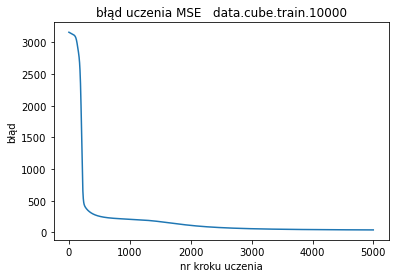

In [35]:
# x_train, layers, no_of_iterations = 5001, include_bias = True
new_parameters = neural_network_regression(x_train, y_train, layers, no_of_iterations = 5000, include_bias = include_bias) 
    #zmienic drugi parametr na y_train gdy będzie znany


In [36]:
new_parameters

{'W1': array([[ 0.29007059],
        [-9.9979736 ],
        [ 2.70347874],
        [ 2.56775721]]),
 'b1': array([[-1.08350316],
        [-2.68224606],
        [-9.26044709],
        [-9.58806636]]),
 'W2': array([[  1.12160917, -10.34686571,   9.64665443,   9.92556427]]),
 'b2': array([[-1.46144111]])}

In [37]:
def predict_regression(parameters, x_test, layers):
    activation_functions = get_activation_functions(layers)
    activation_values = {'0': x_test}
    z_values = {}
    
    predicted_values_regression = all_layers_forward_propagation(parameters,activation_values,activation_functions,
                                                     z_values, no_of_layers=len(layers))
    return predicted_values_regression

wykres działania sieci (regresji na nowych danych)
regression\data.cube.test.10000.csv


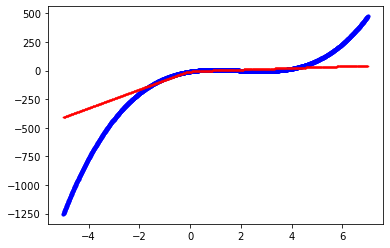

wykres działania sieci (regresji na danych, na których sieć była uczona)
regression\data.cube.train.10000.csv


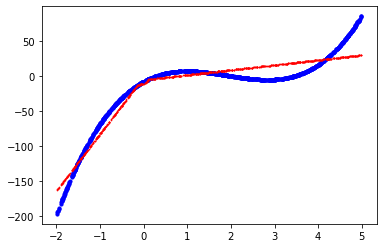

In [38]:
if(regression_problem):
    y_predicted_values_regression = predict_regression(new_parameters, x_test, layers)
    
    
    
    print("wykres działania sieci (regresji na nowych danych)")
    print(regression_test_file)
    plt.scatter(*x_test,*y_test, color='blue', s=10)
    plt.scatter(*x_test,*y_predicted_values_regression, color='red', s=5)
    
    plt.title(error_type + '  ' + regression_test_file)
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.savefig(f'wykresy/{now}_{regression_test_file[11:-4]}_{error_type}__{len(hidden_layers)}_hidden_layers.jpg')
    plt.show()
    
    
    
    #na danych treningowych
    print("wykres działania sieci (regresji na danych, na których sieć była uczona)")
    print(regression_train_file)
    y_train_predicted = predict_regression(new_parameters, x_train, layers)
    plt.scatter(*x_train,*y_train, color='blue', s=10)
    plt.scatter(*x_train,*y_train_predicted, color='red', s=5)
    
    plt.title(error_type + '  ' + regression_train_file)
    plt.xlabel('x')
    plt.ylabel('y')    
    plt.savefig(f'wykresy/{now}_{regression_train_file[11:-4]}_{error_type}__{len(hidden_layers)}_hidden_layers.jpg')
    plt.show()
    
    
#with np.printoptions(threshold=np.inf):
 #   print(y_predicted_values_regression.tolist())